# Introduction in NN model

1. First we load the dataset and split it into train and validation datasets
2. Next we define our model using Keras with TensorFlow as backend
3. Then we compile our model by specifying loss function and optimizer
4. Then we'll fit our model to the train dataset 
5. Lastly, we evaluate our model on the validation dataset

## Step 1: Data Prep

### 1.1 Loading and describing dataset
Using `pandas` we'll load the dataset. We also see that all variables are numeric, so, will go ahead and generate basic stats like
* the shape of dataset we are dealing with using `df.shape`
* number of outcomes to total number of observations also called event rate
* distribution of variables using `df.describe`

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print('Number of Rows :', df.shape[0])
print('Number of Columns :', df.shape[1])
print('Number of Patients with outcome 1 :', df.Outcome.sum())
print('Event Rate :', round(df.Outcome.mean()*100,2) ,'%')

Number of Rows : 768
Number of Columns : 9
Number of Patients with outcome 1 : 268
Event Rate : 34.9 %


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 1.2 Splitting data in train and test
Here we can use powerful `sklearn` library to randomly split the observations in the dataset into test and train. We'll also set the `seed` parameter to make splits reproducible

In [4]:
from sklearn.model_selection import train_test_split

X = df.to_numpy()[:,0:8] 
Y = df.to_numpy()[:,8]

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = seed)

print(f'Shape of Train Data : {X_train.shape}')
print(f'Shape of Test Data : {X_test.shape}')

Shape of Train Data : (576, 8)
Shape of Test Data : (192, 8)


## Step 2: Define the Model
* Models in Keras are defined as a sequence of layers. We create a `Sequential` model and add layers one at a time. The first thing to get right is to ensure the input layer has the right number of inputs
*  Fully connected layers are defined using the `Dense` class. We can specify the number of neurons in the layer as the first argument, specify the activation function using the `activation` argument

The Sequential model is a linear stack of layers. The common architecture of ConvNets is a sequential architecture. However, some architectures are not linear stacks. For example, siamese networks are two parallel neural networks with some shared layers. More examples here.

The first type of layer is the Dense layer, also called the fully-connected layer, and is used for abstract representations of input data. In this layer, neurons connect to every neuron in the preceding layer. In multilayer perceptron networks, these layers are stacked together.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(24, input_dim = (8), activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

## Step 3: Compile the model
We specify the loss function to use to evaluate a set of weights. We will use `binary_crossentropy` which is defined in Keras for binary classification problem. We also specify the optimizer used to search through different weights for the network. Here we will use `adam` optimizer

The Adam optimizer, short for “Adaptive Moment Estimation,” is an iterative optimization algorithm used to minimize the loss function during the training of neural networks. Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum.

Binary Cross Entropy is a loss function used in machine learning and deep learning to measure the difference between predicted binary outcomes and actual binary labels. It quantifies the dissimilarity between probability distributions, aiding model training by penalizing inaccurate predictions.

In [6]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


### Step 4: Fit Model
We can fit the model using the `fit()` method. We can also set the number of instances that are evaluated before a weight update in the network is performed called the **batch size** and set using the `batch_size` argument

In [7]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose = 1)

Epoch 1/150
18/18 [==============================] - 0s 1ms/step - loss: 6.9588 - accuracy: 0.6493
Epoch 2/150
18/18 [==============================] - 0s 1ms/step - loss: 2.1514 - accuracy: 0.5608
Epoch 3/150
18/18 [==============================] - 0s 1ms/step - loss: 1.4183 - accuracy: 0.5503
Epoch 4/150
18/18 [==============================] - 0s 1ms/step - loss: 1.0535 - accuracy: 0.5712
Epoch 5/150
18/18 [==============================] - 0s 1ms/step - loss: 0.8502 - accuracy: 0.6146
Epoch 6/150
18/18 [==============================] - 0s 1ms/step - loss: 0.7455 - accuracy: 0.6510
Epoch 7/150
18/18 [==============================] - 0s 1ms/step - loss: 0.7090 - accuracy: 0.6389
Epoch 8/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.6580
Epoch 9/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.6580
Epoch 10/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.6510
Epoch 11/

### Step 5: Evaluate model
We can evaluate our model on validation dataset using the `evaluation()` function. This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy

In [8]:
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]} : {round(scores[1] * 100, 2)} %')

6/6 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.6979
accuracy : 69.79 %


### Bonus Step
Plot the journey of loss and accuracy metric over epochs

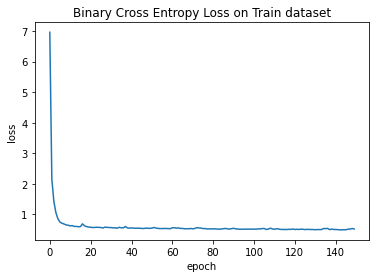

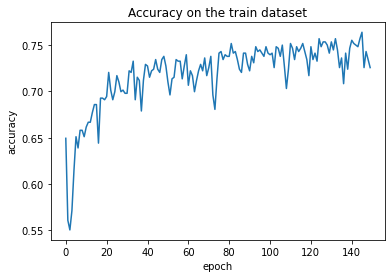

In [9]:
import matplotlib.pyplot as plt

# Plotting loss
plt.plot(history.history['loss'])
plt.title('Binary Cross Entropy Loss on Train dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Plotting accuracy metric
plt.plot(history.history['accuracy'])
plt.title('Accuracy on the train dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Introduction in Web Scraping

Python requests module has several built-in methods to make HTTP requests to specified URI using GET, POST, PUT, PATCH, or HEAD requests. A HTTP request is meant to either retrieve data from a specified URI or to push data to a server. It works as a request-response protocol between a client and a server. Here we will be using the GET request. The GET method is used to retrieve information from the given server using a given URI. The GET method sends the encoded user information appended to the page request. 

In [ ]:
import requests 

# Making a GET request 
r = requests.get('http://portal.lbi.ro/educatie/comunitate/clubul-de-inteligenta-artificiala/') 

# check status code for response received 
# success code - 200 
print(r)

# print content of request 
print(r.content)

BeautifulSoup Library
Beautiful Soup provides a few simple methods and Pythonic phrases for guiding, searching, and changing a parse tree: a toolkit for studying a document and removing what you need. It doesn’t take much code to document an application.

Beautiful Soup automatically converts incoming records to Unicode and outgoing forms to UTF-8. You don’t have to think about encodings unless the document doesn’t define an encoding, and Beautiful Soup can’t catch one. Then you just have to choose the original encoding. Beautiful Soup sits on top of famous Python parsers like LXML and HTML, allowing you to try different parsing strategies or trade speed for flexibility.

Importing Libraries: The code imports the requests library for making HTTP requests and the BeautifulSoup class from the bs4 library for parsing HTML.
Making a GET Request: It sends a GET request to ‘http://portal.lbi.ro/educatie/comunitate/clubul-de-inteligenta-artificiala/’ and stores the response in the variable r.
Checking Status Code: It prints the status code of the response, typically 200 for success.
Parsing the HTML: The HTML content of the response is parsed using BeautifulSoup and stored in the variable soup.
Printing the Prettified HTML: It prints the prettified version of the parsed HTML content for readability and analysis.

In [ ]:
import requests 
from bs4 import BeautifulSoup 

# Making a GET request 
r = requests.get('http://portal.lbi.ro/educatie/comunitate/clubul-de-inteligenta-artificiala/') 

# check status code for response received 
# success code - 200 
print(r) 

# Parsing the HTML 
soup = BeautifulSoup(r.content, 'html.parser') 
print(soup.prettify())